# Testing node2vec on Directed Graphs

In [ ]:
# default_exp embeddings
from nbdev.showdoc import *
import numpy as np
import torch
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [ ]:
from node2vec import node2vec

# Load the Dataset
The test of whether node2vec can incorporate directional information resides in the directed stochastic block model. With the right parameter values (a uniform $\alpha_{ij}$), it's impossible to distinguish the clusters *without* employing directional information.

node2vec does appear to work on directed adjacency matrices, but the embeddings produced by node2vec suffer from the trevails of enforced symmetry. The embedding of $i$ has the same relation to $j$, as $j$ to $i$. Does this hinder node2vec from learning a reasonable embedding of directed data?

We'll start by loading the directed SBM:

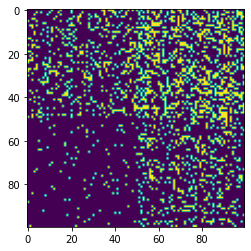

In [ ]:
from directed_graphs.datasets import DirectedStochasticBlockModel
aij = np.array([[0.4,0.4],[0.4,0.4]])
bij = np.array([[0.5,0.9],[0.1,0.5]])
dataset = DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, aij = aij, bij = bij)
data = dataset[0] # there is only graph in this dataset
sparse_A = torch.sparse_coo_tensor(data.edge_index,torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()
plt.imshow(A)

The dataset must be converted to networkx format for node2vec.

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx
G_nx = to_networkx(data, to_undirected=False)

In [ ]:
import node2vec

In [ ]:
from node2vec import Node2Vec

In [ ]:

node2vec = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar('2')  # Output node names are always strings

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 155.22it/s]


[('99', 0.4385221302509308),
 ('96', 0.404387891292572),
 ('62', 0.3835284411907196),
 ('65', 0.36264196038246155),
 ('29', 0.3619473874568939),
 ('94', 0.3618748188018799),
 ('81', 0.3492133319377899),
 ('38', 0.3456926643848419),
 ('8', 0.34503066539764404),
 ('56', 0.34293317794799805)]

The node2vec library used here (available via pip install) returns a fit instance of word2vec. To extract the embeddings, we have to pretend each node is a word 'i'.

In [ ]:
wordlist = [str(i) for i in range(100)]
wordlist

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [ ]:
word2vec_embeddings = model.wv[wordlist]

In [ ]:
word2vec_embeddings

array([[ 0.26694113,  0.09387849,  0.19337721, ..., -0.07964128,
         0.07389846,  0.06320159],
       [-0.14090535, -0.16869967,  0.11920308, ..., -0.26588392,
         0.0911374 , -0.1947111 ],
       [ 0.13747576, -0.13978384,  0.02310258, ..., -0.11007176,
        -0.08820041, -0.05209169],
       ...,
       [ 0.01189836,  0.01433688,  0.11823416, ..., -0.05746526,
         0.07515478,  0.14502901],
       [ 0.08563036, -0.02366519, -0.1927407 , ..., -0.03609654,
         0.18129422,  0.05449359],
       [ 0.12306868, -0.13931657,  0.03584953, ...,  0.02982144,
         0.11820973, -0.20247374]], dtype=float32)

In [ ]:
word2vec_embeddings.shape

(100, 64)

Visualize the embedding with PHATE

In [ ]:
import phate
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(word2vec_embeddings)

Calculating PHATE...
  Running PHATE on 100 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.05 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 0.10 seconds.


In [ ]:
clusters = np.repeat([0,1],50)

/var/folders/y5/4qfj8yjj1hb97n6q01_dg0km0000gn/T/ipykernel_27365/4260628001.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)
/Users/adjourner/miniforge3/envs/pyg_from_source/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

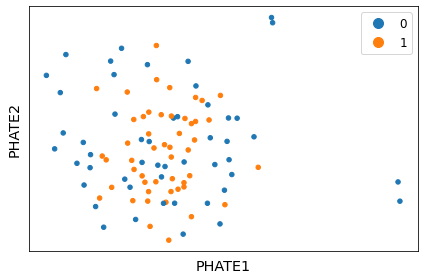

In [ ]:
phate.plot.scatter(data_phate[:,0],data_phate[:,1],c=clusters)

We'll double check this result with PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(word2vec_embeddings)

In [ ]:
pcs

array([[ 1.88231796e-01,  5.17497003e-01],
       [-9.63772275e-03, -2.26421878e-01],
       [ 2.00143233e-02,  2.44662672e-01],
       [-9.01162773e-02,  1.57214925e-01],
       [ 1.17732838e-01,  4.74584848e-03],
       [ 1.75348744e-01, -6.02708042e-01],
       [ 7.01669720e-04,  8.87729898e-02],
       [ 8.11238110e-01, -2.96754360e-01],
       [ 5.81938773e-02,  8.87507796e-02],
       [-1.03128567e-01,  2.26330027e-01],
       [ 2.06476301e-01, -2.43752345e-01],
       [ 2.58295983e-02, -4.11980674e-02],
       [ 6.28299788e-02,  3.21492285e-01],
       [ 3.46608430e-01, -7.95164257e-02],
       [ 6.11476719e-01,  8.79633784e-01],
       [-9.77019295e-02, -2.49868944e-01],
       [ 3.19789559e-01, -3.28737557e-01],
       [ 2.95717865e-01, -2.39880040e-01],
       [ 2.71617442e-01,  1.45131379e-01],
       [-3.59451957e-02,  1.62307531e-01],
       [ 1.69223756e-01, -3.75799015e-02],
       [ 2.80716121e-01,  7.58053139e-02],
       [-3.77034359e-02, -1.52165517e-01],
       [ 1.

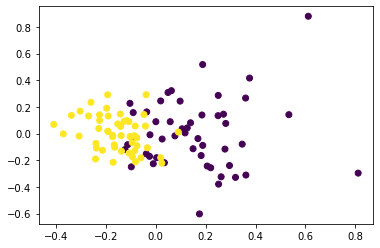

In [ ]:
plt.scatter(pcs[:,0],pcs[:,1],c=clusters)

# Does this work if it's undirected?

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx
G_nx = to_networkx(data, to_undirected=True)

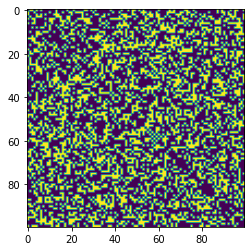

In [ ]:
A_s = 1/2*(A + A.T)
plt.imshow(A_s)

In [ ]:
from node2vec import Node2Vec
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model2 = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model2.wv.most_similar('2')  # Output node names are always strings

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 118.83it/s]


[('35', 0.42945635318756104),
 ('4', 0.3440379500389099),
 ('21', 0.3429870307445526),
 ('1', 0.33976680040359497),
 ('19', 0.3339807689189911),
 ('44', 0.3329753875732422),
 ('6', 0.331703245639801),
 ('27', 0.3312684893608093),
 ('81', 0.32838162779808044),
 ('92', 0.3229937255382538)]

In [ ]:
word2vec_embeddings2 = model2.wv[wordlist]

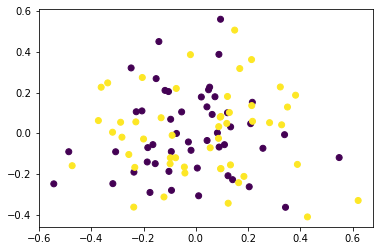

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(word2vec_embeddings2)
plt.scatter(pcs[:,0],pcs[:,1],c=clusters)

# Bipartite Graph

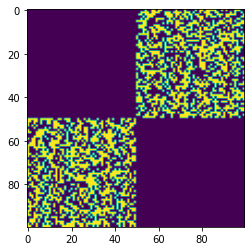

In [ ]:
from directed_graphs.datasets import DirectedStochasticBlockModel
aij = np.array([[0.0,1],[1,0]])
bij = np.array([[0.5,0.5],[0.5,0.5]])
dataset = DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, aij = aij, bij = bij)
data = dataset[0] # there is only graph in this dataset
sparse_A = torch.sparse_coo_tensor(data.edge_index,torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()
plt.imshow(A)

In [ ]:
G_nx = to_networkx(data, to_undirected=False)

In [ ]:
from node2vec import Node2Vec
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model2 = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model2.wv.most_similar('2')  # Output node names are always strings

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 126.87it/s]


[('38', 0.7977835536003113),
 ('23', 0.7971742749214172),
 ('42', 0.794073760509491),
 ('29', 0.7594153881072998),
 ('32', 0.7572621703147888),
 ('49', 0.7516230940818787),
 ('46', 0.7414773106575012),
 ('6', 0.7289462089538574),
 ('31', 0.7288908362388611),
 ('1', 0.717528760433197)]

In [ ]:
word2vec_embeddings2 = model2.wv[wordlist]

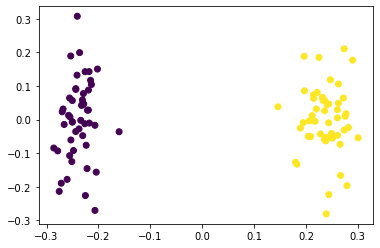

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(word2vec_embeddings2)
plt.scatter(pcs[:,0],pcs[:,1],c=clusters)

Let's formalize the steps of running node2vec on a graph and obtaining a PCA plot.

In [ ]:
# export
from node2vec import Node2Vec
from sklearn.decomposition import PCA

def node2vec_and_plot(data,n_clusters,title=""):
  G_nx = to_networkx(data, to_undirected=False)
  n_points = data.x.shape[1]
  node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
  # Embed nodes
  model = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
  # Get words
  wordlist = [str(i) for i in range(n_points)]
  clusters = np.repeat(list(range(n_clusters)),n_points/n_clusters)
  # Extract embeddings
  ems = model.wv[wordlist]
  print("performing PCA...")
  pca = PCA(n_components=2)
  clusters = np.repeat(list(range(n_clusters)),n_points/n_clusters)
  pcs = pca.fit_transform(ems)
  plt.figure()
  scatter = plt.scatter(pcs[:,0],pcs[:,1],c=clusters)
  plt.legend(handles = scatter.legend_elements()[0], title="Blobs", labels=list(range(n_clusters)))
  plt.suptitle(title)
  return word2vec_embeddings
  

# Sinks and Sources

Computing transition probabilities:   0%|          | 0/700 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:04<00:00, 12.20it/s]


performing PCA...


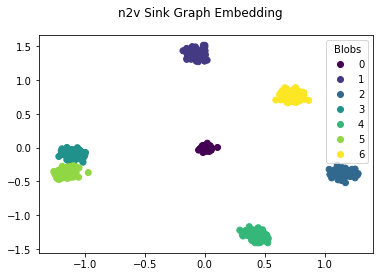

In [ ]:
from directed_graphs.datasets import sink_graph, source_graph
dataset = sink_graph(n_points = 700)
data = dataset[0]
ems = node2vec_and_plot(data,7,title="n2v Sink Graph Embedding")

Computing transition probabilities:   0%|          | 0/700 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:04<00:00, 11.33it/s]


performing PCA...


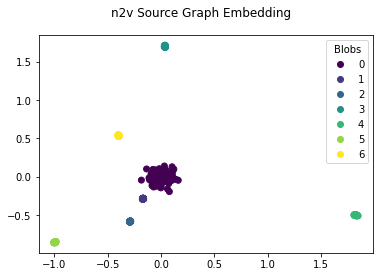

In [ ]:
dataset = source_graph(n_points = 700)
data = dataset[0]
ems = node2vec_and_plot(data,7, title="n2v Source Graph Embedding")

# Node2Vec on Simple Random Graphs

In [ ]:
from directed_graphs.datasets import SmallRandom, visualize_graph, SourceSink
pre_transform = SourceSink(prob_source=0.5, prob_sink=0, adv_prob=0.1, remove_prob=0)
dataset = SmallRandom(num_nodes=20, prob_edge=0.2, pre_transform=pre_transform)
data = dataset[0] # there is only graph in this dataset

/Users/adjourner/Projects/directed_graphs/directed_graphs/datasets.py:122: UserWarning: Data has no ground-truth labels
  warnings.warn("Data has no groud-truth labels")


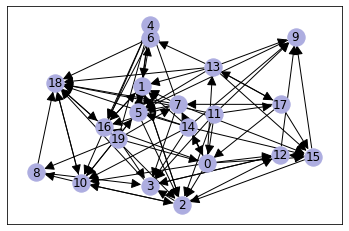

In [ ]:
visualize_graph(data)

Computing transition probabilities:   0%|          | 0/20 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 1095.12it/s]


performing PCA...


Text(0.5, 0.98, 'Half source Nodes, no sink nodes')

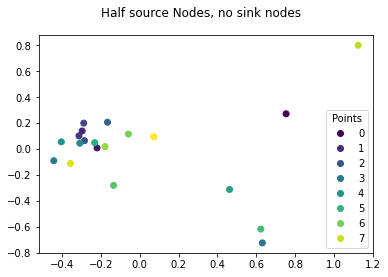

In [ ]:
G_nx = to_networkx(data, to_undirected=False)
n_points = data.x.shape[1]
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
# Get words
wordlist = [str(i) for i in range(n_points)]
# Extract embeddings
ems = model.wv[wordlist]
print("performing PCA...")
pca = PCA(n_components=2)
pcs = pca.fit_transform(ems)
plt.figure()
clusters = list(range(n_points))
# print(clusters)
scatter2 = plt.scatter(pcs[:,0],pcs[:,1],c=clusters)
plt.legend(handles = scatter2.legend_elements()[0], title="Points", labels=list(range(n_points)))
plt.suptitle("Half source Nodes, no sink nodes")

/Users/adjourner/Projects/directed_graphs/directed_graphs/datasets.py:122: UserWarning: Data has no ground-truth labels
  warnings.warn("Data has no groud-truth labels")


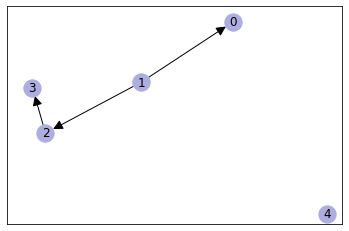

In [ ]:
from directed_graphs.datasets import SmallRandom, visualize_graph, SourceSink
pre_transform = SourceSink(prob_source=0, prob_sink=0, adv_prob=0.1, remove_prob=0)
dataset = SmallRandom(num_nodes=5, prob_edge=0.2, pre_transform=pre_transform)
data = dataset[0] # there is only graph in this dataset
visualize_graph(data)

Computing transition probabilities:   0%|          | 0/5 [00:00<?, ?it/s]

performing PCA...


Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 101606.20it/s]


Text(0.5, 0.98, 'Half source Nodes, no sink nodes')

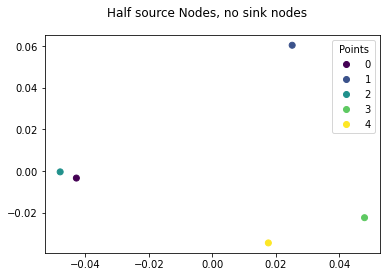

In [ ]:
G_nx = to_networkx(data, to_undirected=False)
n_points = data.x.shape[1]
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
# Get words
wordlist = [str(i) for i in range(n_points)]
# Extract embeddings
ems = model.wv[wordlist]
print("performing PCA...")
pca = PCA(n_components=2)
pcs = pca.fit_transform(ems)
plt.figure()
clusters = list(range(n_points))
scatter2 = plt.scatter(pcs[:,0],pcs[:,1],c=clusters)
plt.legend(handles = scatter2.legend_elements()[0], title="Points", labels=list(range(n_points)))
plt.suptitle("Half source Nodes, no sink nodes")

/Users/adjourner/Projects/directed_graphs/directed_graphs/datasets.py:122: UserWarning: Data has no ground-truth labels
  warnings.warn("Data has no groud-truth labels")


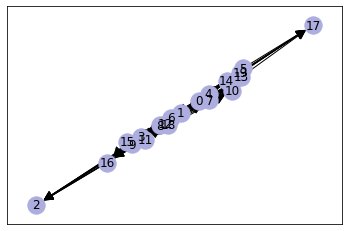

In [ ]:
from directed_graphs.datasets import SmallRandom, visualize_graph, SourceSink
pre_transform = SourceSink(prob_source=0, prob_sink=0.2, adv_prob=0.1, remove_prob=0)
dataset = SmallRandom(num_nodes=20, prob_edge=0.2, pre_transform=pre_transform)
data = dataset[0] # there is only graph in this dataset
visualize_graph(data)

Computing transition probabilities:   0%|          | 0/20 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 5299.45it/s]


performing PCA...


Text(0.5, 0.98, 'Half source Nodes, no sink nodes')

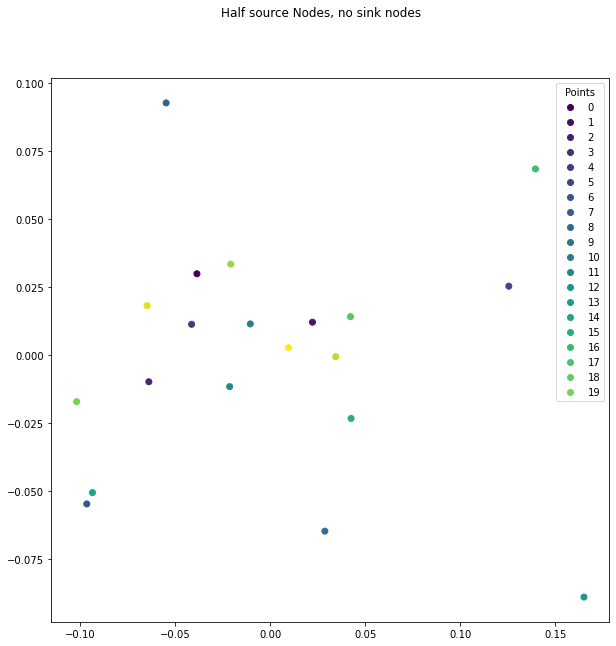

In [ ]:
G_nx = to_networkx(data, to_undirected=False)
n_points = data.x.shape[1]
node2vec2 = Node2Vec(G_nx, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model = node2vec2.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
# Get words
wordlist = [str(i) for i in range(n_points)]
# Extract embeddings
ems = model.wv[wordlist]
print("performing PCA...")
pca = PCA(n_components=2)
pcs = pca.fit_transform(ems)
plt.figure(figsize=(10,10))
clusters = list(range(n_points))
# scatter2 = plt.scatter(pcs[:,0],pcs[:,1],c=clusters)
# handles, _ = scatter2.legend_elements(prop='colors',num=25)
# plt.legend(handles = handles, title="Points", labels=list(range(n_points)))
# plt.suptitle("Half source Nodes, no sink nodes")

Calculating PHATE...
  Running PHATE on 20 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 24
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.05 seconds.
Calculated PHATE in 0.06 seconds.


/Users/adjourner/miniforge3/envs/pyg_from_source/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:>

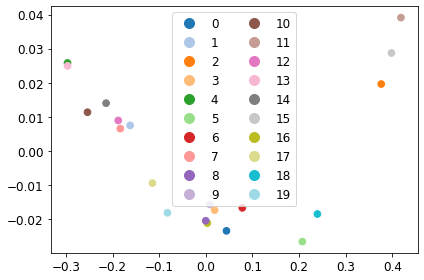

In [ ]:
import phate
import scprep
phate_op = phate.PHATE(knn=3,decay=30)
data_phate = phate_op.fit_transform(ems)
scprep.plot.scatter(data_phate[:,0],data_phate[:,1],c=list(range(n_points)))